##Zomato Data Analysis Project
importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Zomato data .csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
#conver the datatype of rate column
def ratings(val):
  val=str(val).split("/")
  val=val[0]
  return float(val)

data["rate"]=data["rate"].apply(ratings)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
#type of restaurants
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Restaurant types')

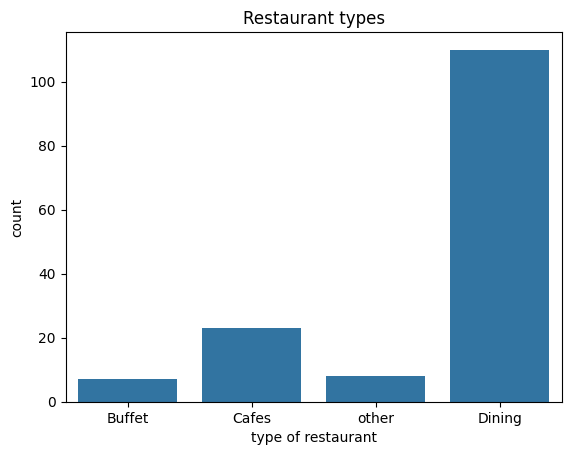

In [ ]:
sns.countplot(x="listed_in(type)",data=data)
plt.xlabel("type of restaurant")
plt.title("Restaurant types")

Majority of reataurant is dyning type

Text(0, 0.5, 'votes')

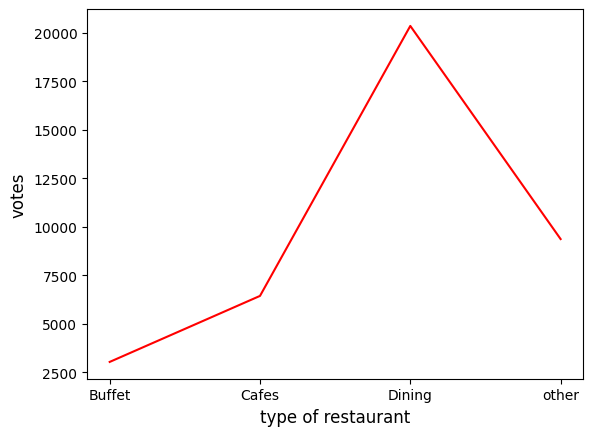

In [ ]:
grouped_data=data.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="red")
plt.xlabel("type of restaurant",size=12)
plt.ylabel("votes",size=12)

Dining restaurants got maximum votes

Text(0, 0.5, 'count')

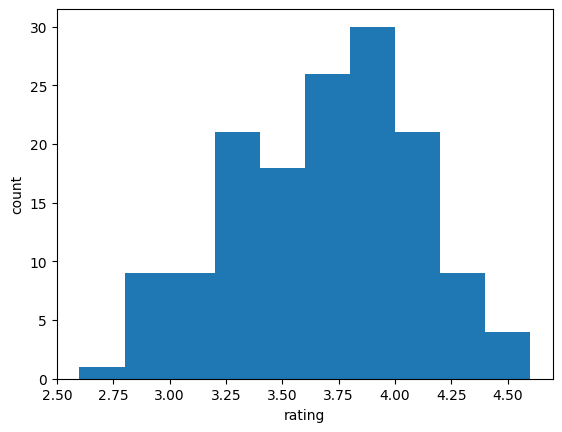

In [ ]:
plt.hist(data['rate'],bins=10)
plt.xlabel("rating")
plt.ylabel("count")

Majority restaurents getting 3.5-4.25 ratings

In [ ]:
#avarage spendings by couple
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

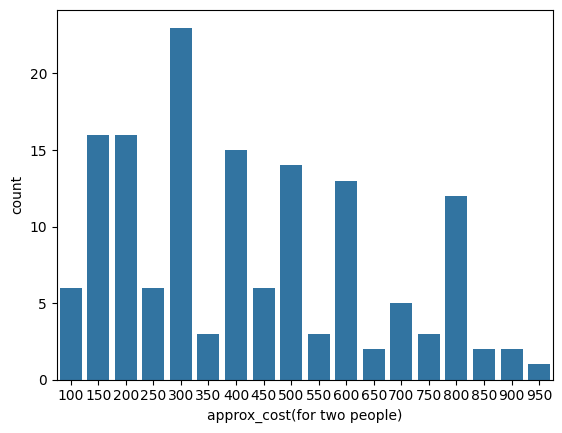

In [ ]:
couple_data=data["approx_cost(for two people)"]
sns.countplot(x=couple_data)

Conclution: The majority of couple prefer restaurants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

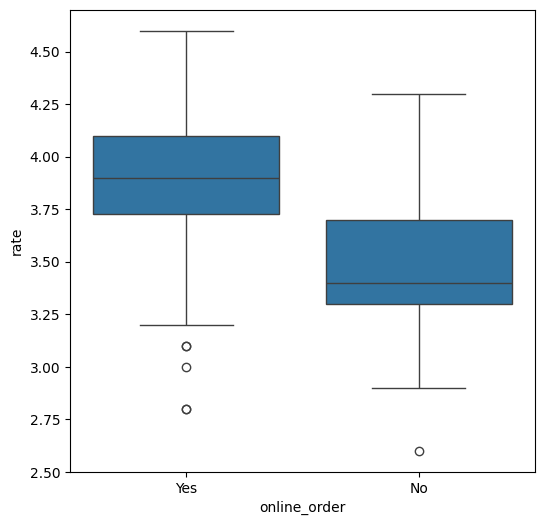

In [ ]:
#which mode receives maximum ratings
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=data)

Conclution: offline order receives lower ratings than online order

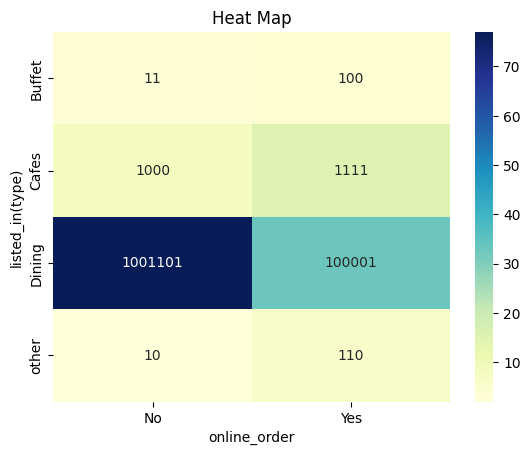

In [ ]:
#
pivot_table=data.pivot_table(index="listed_in(type)",columns="online_order",aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='b')
plt.title("Heat Map")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()